In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


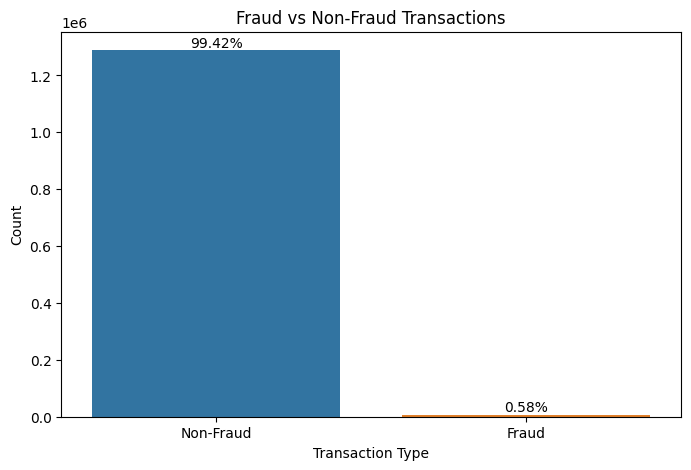

In [9]:
# Count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.2f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 10000
    ax.annotate(percentage, (x, y), ha='center')

plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [12]:
fraud_count = df['is_fraud'].sum()
non_fraud_count = len(df) - fraud_count

print(f"Fraud cases: {fraud_count} ({fraud_count/len(df)*100:.2f}%)")
print(f"Non-fraud cases: {non_fraud_count}")
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Randomly sample non-fraud cases to match fraud count
non_fraud_sampled = non_fraud_df.sample(n=fraud_count, random_state=42)

# Combine into a balanced dataset
balanced_df = pd.concat([fraud_df, non_fraud_sampled])

# Shuffle the dataset to mix fraud and non-fraud cases
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

Fraud cases: 7506 (0.58%)
Non-fraud cases: 1289169


In [13]:
print(balanced_df['is_fraud'].value_counts())
print(f"New fraud rate: {balanced_df['is_fraud'].mean()*100:.2f}%")

is_fraud
1    7506
0    7506
Name: count, dtype: int64
New fraud rate: 50.00%


In [33]:
cols_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'merchant', 'city', 'job']
df = balanced_df.drop(cols_to_drop, axis=1)

In [34]:
balanced_df['trans_date_trans_time'] = pd.to_datetime(balanced_df['trans_date_trans_time'])
balanced_df['hour'] = balanced_df['trans_date_trans_time'].dt.hour
balanced_df['day_of_week'] = balanced_df['trans_date_trans_time'].dt.dayofweek
balanced_df['month'] = balanced_df['trans_date_trans_time'].dt.month
balanced_df = balanced_df.drop('trans_date_trans_time', axis=1)

In [35]:
# Label encoding for binary categories (gender)
balanced_df['gender'] = balanced_df['gender'].map({'F': 0, 'M': 1})

# One-hot encoding for high-cardinality categories
balanced_df = pd.get_dummies(balanced_df, columns=['category', 'state'])

In [36]:
from datetime import datetime

balanced_df['dob'] = pd.to_datetime(balanced_df['dob'])
balanced_df['age'] = (datetime.now() - balanced_df['dob']).dt.days // 365
balanced_df = balanced_df.drop('dob', axis=1)

In [42]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid modifying the original
df_encoded = balanced_df.copy()

# Label encode binary categories (e.g., gender)
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    if col != 'is_fraud':  # Skip target variable
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le  # Save encoder for later use

In [44]:
corr_matrix = df_encoded.corr()
fraud_correlations = corr_matrix['is_fraud'].sort_values(ascending=False)
print(fraud_correlations)

is_fraud                   1.000000
amt                        0.619952
category_shopping_net      0.206911
category_grocery_pos       0.177540
category_misc_net          0.132615
                             ...   
category_personal_care    -0.102760
category_kids_pets        -0.114217
category_food_dining      -0.115838
category_health_fitness   -0.117532
category_home             -0.147964
Name: is_fraud, Length: 88, dtype: float64


In [45]:
# Get top N features most correlated with 'is_fraud' (absolute value)
top_features = corr_matrix['is_fraud'].abs().sort_values(ascending=False).head(10).index.tolist()
top_features.remove('is_fraud')  # Remove target variable
print("Top features:", top_features)

Top features: ['amt', 'category_shopping_net', 'category_grocery_pos', 'category_home', 'category_misc_net', 'category_health_fitness', 'category_food_dining', 'category_kids_pets', 'category_personal_care']


In [46]:
from sklearn.model_selection import train_test_split

# Select top features
X = balanced_df[top_features]
y = balanced_df['is_fraud']

# Split data (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [47]:
X_train.shape


(12009, 9)

In [48]:
X_test.shape

(3003, 9)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1502
           1       0.93      0.74      0.83      1501

    accuracy                           0.84      3003
   macro avg       0.86      0.84      0.84      3003
weighted avg       0.86      0.84      0.84      3003

AUC: 0.8649555422882746
